In [1]:
% matplotlib inline
from plot_setup import *
import seaborn as sns
sns.set_style('whitegrid')
sns.set_palette("tab10",10)
#sns.palplot(sns.color_palette("tab10",10))

In [8]:
% matplotlib inline
from plot_setup import *
import model_definition as model
import seaborn as sns
#sns.set(style="ticks",palette="tab10")
sns.set_style('whitegrid')
sns.set_palette("tab10",10)
import matplotlib

#args_pairplot = {"size":5,"plot_kws":{"s":8,"marker":"o"},"diag_kws":{"bins":32,"histtype":"stepfilled","alpha":0.3}}
args_pairplot = {"plot_kws":{"s":8,"marker":"o"},"diag_kws":{"bins":32,"histtype":"stepfilled","alpha":0.3}}

def mypairplot(
    mcchain,
    scatter_kws={"s":8,"marker":"o","alpha":0.1},
    kde_kws={"shade":True,"shade_lowest":False,"cmap":"jet"},
    hist_kws={"bins":32,"histtype":"stepfilled","alpha":0.3},
    **kws):
    
    print("Note: The following warnings occur, but no problem.\nUserWarning: The following kwargs were not used by contour: 'label', 'color' ")
    g = sns.PairGrid(mcchain,**kws)
    g = g.map_upper(plt.scatter,**scatter_kws)
    g = g.map_lower(sns.kdeplot,**kde_kws)
    g = g.map_diag(plt.hist, **hist_kws)
    return g

# include mock

## from mem fg

In [15]:
# include unbiased mock
fname_mem = "mock_mem_v002.csv"
fname_fg = "mock_fg_v002.csv"

mem = pd.read_csv(fname_mem)
fg = pd.read_csv(fname_fg)
mem["kind"],fg["kind"]="mem","fg"
tot = pd.concat((mem,fg),ignore_index=True)

## from tot(s)

In [6]:
tots = [pd.read_csv(fname)[["R","v","kind"]] for fname in ["mock_tot_noMCMC_v001_{}.csv".format(str(i)) for i in range(50)]]

R          v kind
0     140.483748  67.949235  mem
1      64.440898  57.639890  mem
2      84.411001  62.825128  mem
3      46.363895  51.954907  mem
4     124.944741  47.111356  mem
5     142.583815  16.888891  mem
6      88.233991  62.381797  mem
7      70.506466  48.347471  mem
8      80.289017  81.992453  mem
9      76.185294  46.833847  mem
10    103.536019  50.225192  mem
11     22.906749  36.481640  mem
12    125.785691  66.279429  mem
13    181.842908  46.975905  mem
14    175.871971  25.836357  mem
15     65.294318  29.585342  mem
16     85.004565  21.825587  mem
17     26.041933  35.016903  mem
18     50.189088  79.008986  mem
19    110.322806  45.784460  mem
20     91.078940  59.926845  mem
21     42.595141  43.321752  mem
22     92.081281  54.806329  mem
23     25.472941  43.944245  mem
24    117.865340  46.218095  mem
25    125.020472  81.623968  mem
26    102.268549  35.132851  mem
27    131.820724   5.593930  mem
28     25.240552  44.755167  mem
29     55.274844  58.581729  mem
...          ...        ...  ...
4970  166.631043  44.260918   fg
4971  169.668535  66.734561   fg
4972  151.384262  36.281268   fg
4973  186.691249  63.073090   fg
4974   73.846299   8.086263   fg
4975   81.362216  22.058022   fg
4976   59.046455  66.633622   fg
4977   94.126465  89.573635   fg
4978  136.324063  69.990202   fg
4979  181.933937  86.540086   fg
4980   66.711916  85.918610   fg
4981  100.683601  35.807421   fg
4982  195.450642  61.499765   fg
4983  151.361241  41.697325   fg
4984  198.963517  71.471665   fg
4985   49.875387  55.615860   fg
4986  111.220892  11.347565   fg
4987  184.512485  43.151057   fg
4988  137.466598  67.649549   fg
4989  179.582977  78.269130   fg
4990  199.454926  63.256081   fg
4991  137.166355  37.305756   fg
4992  193.778320  64.699122   fg
4993  190.149637  55.492244   fg
4994   17.210910  63.855340   fg
4995  124.829307  33.500503   fg
4996  198.332842  34.240492   fg
4997  151.448806  47.894955   fg
4998  104.477722  65.197056   fg
4999  176.810920  88.004170   fg

[5000 rows x 3 columns]

Note: The following warnings occur, but no problem.


/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


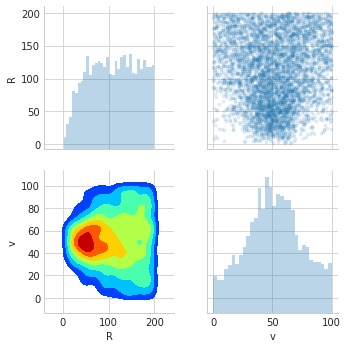

In [9]:
display(tots[0])
display(mypairplot(tots[0]))

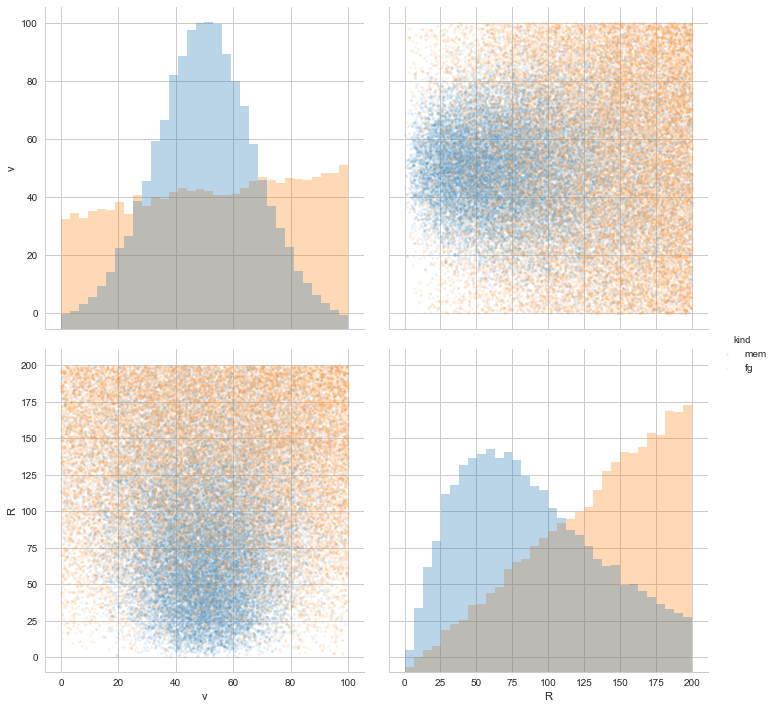

In [16]:
sns.pairplot(tot,vars=("v","R"),hue="kind",hue_order=("mem","fg"),size=5,plot_kws={"s":8,"marker":"o","alpha":0.1},diag_kws={"bins":32,"histtype":"stepfilled","alpha":0.3,"stacked":False})

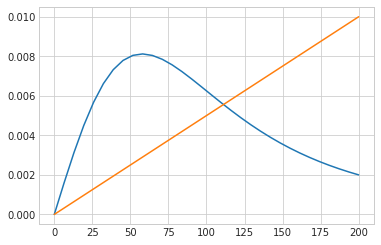

In [13]:
import model_definition as model
from scipy.integrate import quad

def prob_R_mem(R):
    # this is approximation!! (v and R are correlated, 
    # but most of stars are in RoI_v, so integration of Gauss_v is almost 1.
    #
    # \int_0^{R_max} 2*\pi*R * (1+(R/r_e)^2)^{-2} = pi/((1./R_max**2)+(1./r_e**2))
    r_e = model.initial_parameters_mem["r_e"]
    prob = 2*R/r_e**2/(1+(R/r_e)**2)**2 # 2*np.pi*R/np.pi/r_e**2/(1+(R/r_e)**2)**2
    norm = 1/(1+(r_e/model.RoI_R)**2) # integrate prob from 0 to RoI_R
    return prob/norm

def prob_R_fg(R):
    # integrate 2*np.pi*R*
    return 2*np.pi*R/np.pi/model.RoI_R**2

Rs = np.linspace(0,200,32)
plt.plot(Rs,prob_R_mem(Rs))
plt.plot(Rs,prob_R_fg(Rs))

# Create biased Mock

array([ 61, 162, 251, 309, 344, 351, 358, 358, 326, 352, 377, 376, 318,
       358, 355, 344])

In [37]:
import random

#n_sampling_list = (np.arange(31)+1)*60
#fname_sampled = "mock_flatten_sampled_v002.csv"

def biased_sampling(df,kind,k = 2.5e4):

    # separete Rs
    n_separete = 16+1
    mock = pd.DataFrame(df,copy=True)
    mock = mock.sort_values("R")
    # set axes as (axis_bin,axis_R)
    bin_edges = np.linspace(0,model.RoI_R,n_separete)[:,np.newaxis] 
    Rs = np.array(mock.R)[np.newaxis,:]
    # isin_nth_bin (axis_bin,axis_R)
    isin_nth_bin = np.logical_and(bin_edges[:-1]<=Rs,Rs<bin_edges[1:])
    isin_nth_bin.sum(axis=1)

    print("kind:"+ ("mem" if kind=="mem" else "fg")) # for mistype we use it 
    _prob_R = prob_R_mem if kind=="mem" else prob_R_fg
    n_sampling_list = np.round(_prob_R((bin_edges[:-1]+bin_edges[1:]/2).flatten()) * k).astype(int)
    #fname_sampled = "mock_plummerlike_sampled_v002.csv"

    if np.any(n_sampling_list > (isin_nth_bin.sum(axis=1))):
        mes = "n_sampled:" + str(n_sampling_list) + "\n"
        mes += "n_isin_nth_bin:" + str(isin_nth_bin.sum(axis=1))
        plt.plot(n_sampling_list,label="n_sampled")
        plt.plot(isin_nth_bin.sum(axis=1),label="n_isin_nth_bin")
        plt.legend()
        raise TypeError("too many sampling!\n"+str(n_sampling_list > (isin_nth_bin.sum(axis=1)))+"\n"+mes)
    n_bins = len(isin_nth_bin)

    # ind_list: (axis_bin, axis_sampled_ind)
    ind_list = [random.sample(range(num_in_ith_bin),n_sampling) for n_sampling,num_in_ith_bin in zip(n_sampling_list,isin_nth_bin.sum(axis=1))] 
    sampled_list = [(mock[isin_nth_bin[i]].iloc[ind_list[i]]).sort_values("R") for i in range(n_bins)]
    mock_sampled = pd.concat(sampled_list)
    sns.pairplot(
        mock_sampled,
        vars=("v","R"),hue="kind",hue_order=("mem","fg"),size=5,
        plot_kws={"s":8,"marker":"o","alpha":0.1},
        diag_kws={"bins":32,"histtype":"stepfilled","alpha":0.3,"stacked":False}
    )
    return mock_sampled

kind:mem
kind:mem
kind:mem
kind:mem
kind:mem
kind:mem
kind:mem
kind:mem
kind:mem
kind:mem
kind:mem
kind:mem
kind:mem
kind:mem
kind:mem
kind:mem
kind:mem
kind:mem
kind:mem
kind:mem
kind:mem


/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


kind:mem
kind:mem
kind:mem
kind:mem
kind:mem
kind:mem
kind:mem
kind:mem
kind:mem
kind:mem
kind:mem
kind:mem
kind:mem
kind:mem
kind:mem
kind:mem
kind:mem
kind:mem
kind:mem
kind:mem
kind:mem
kind:mem
kind:mem
kind:mem
kind:mem
kind:mem
kind:mem
kind:mem
kind:mem


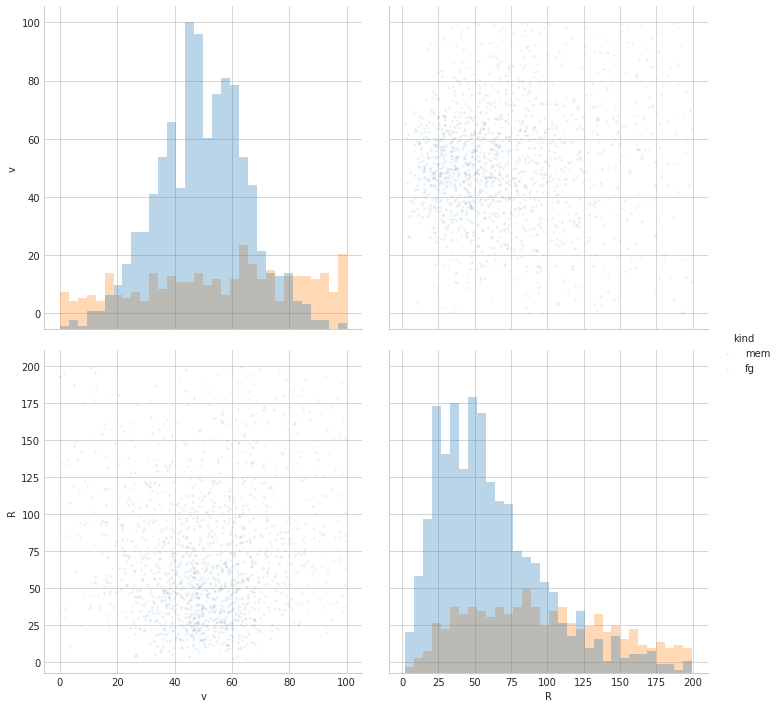

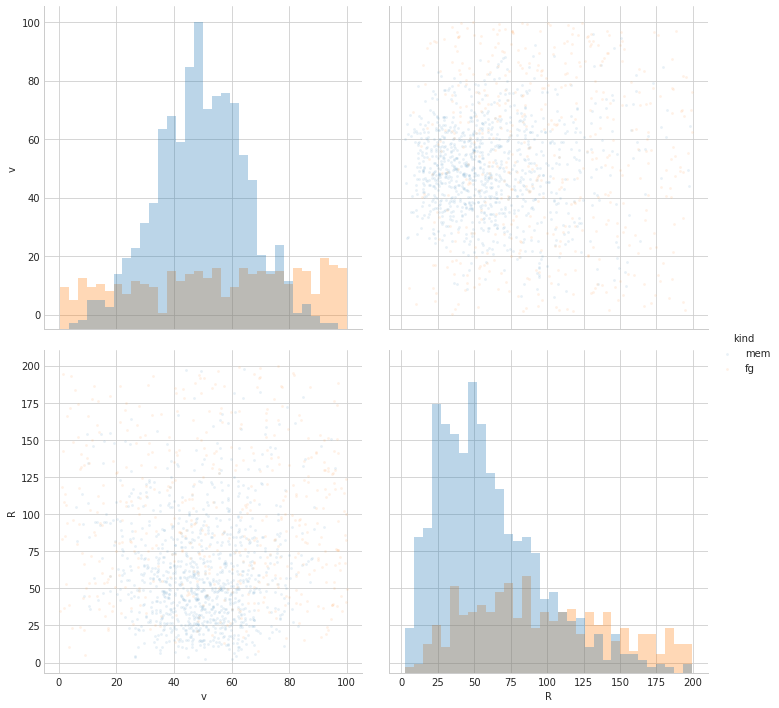

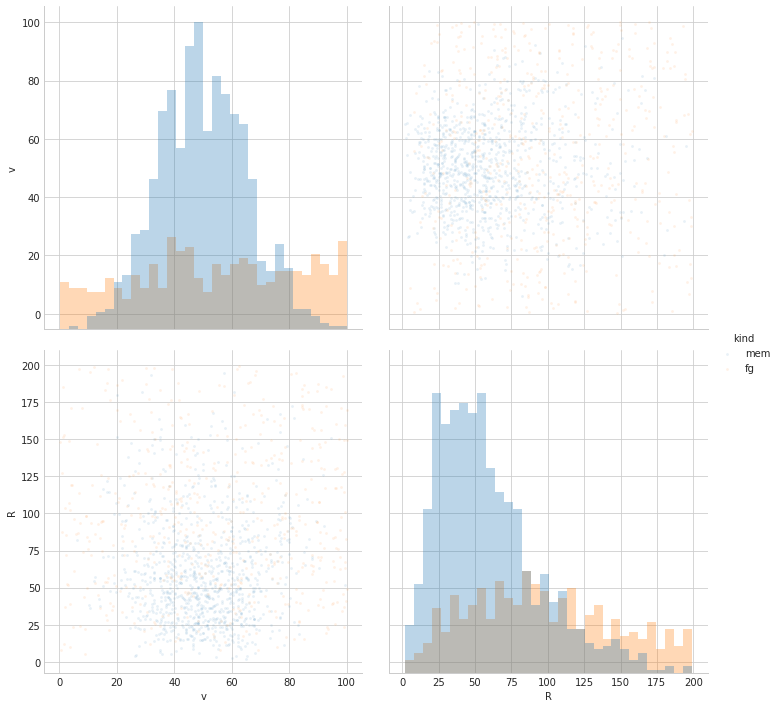

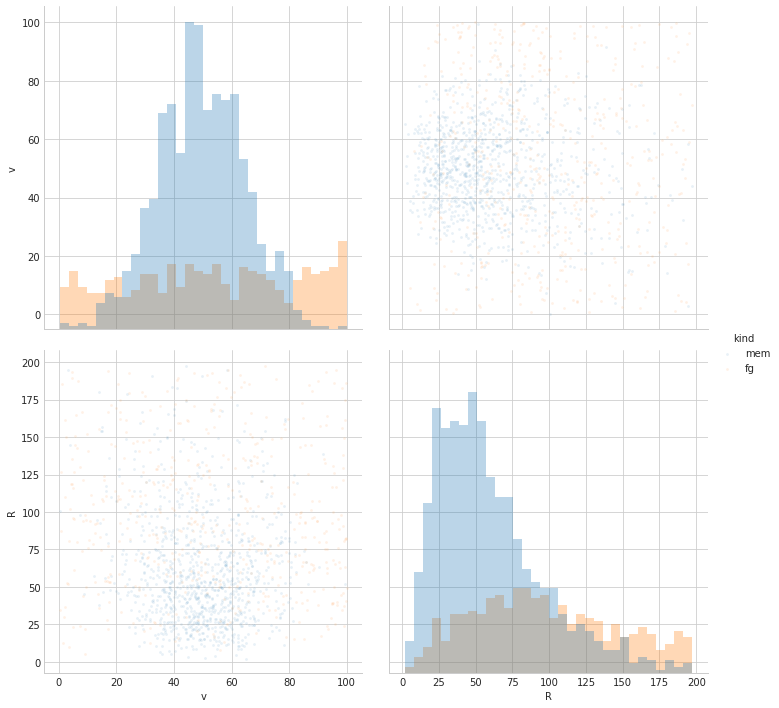

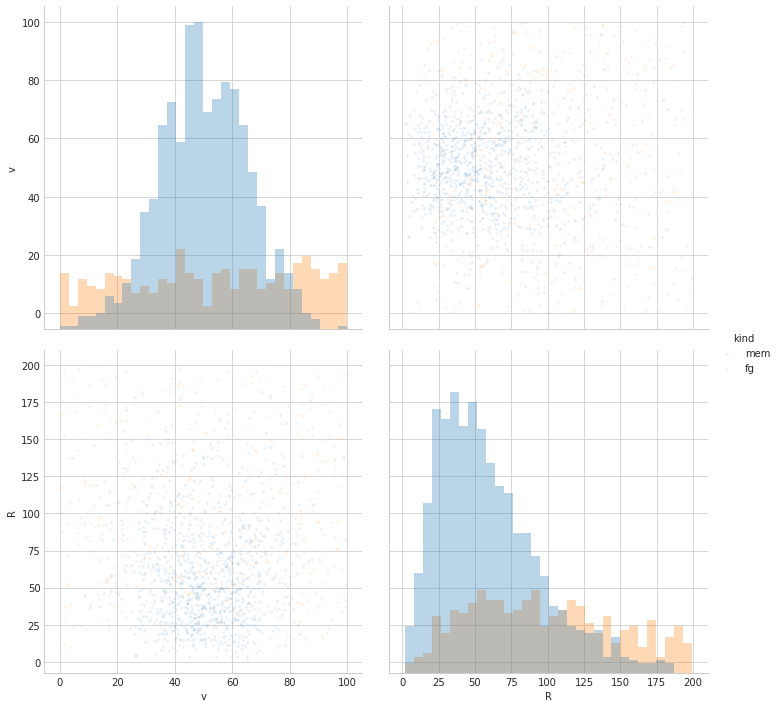

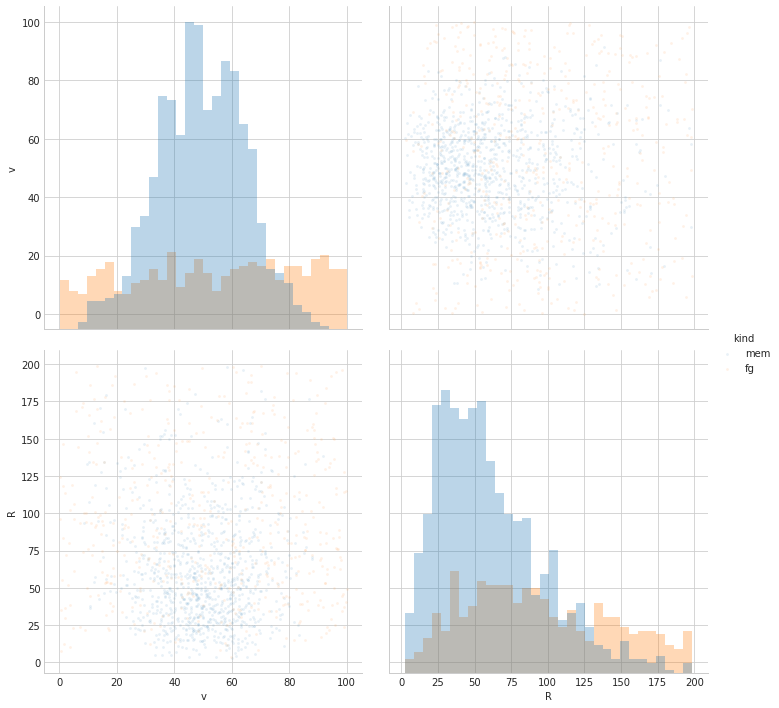

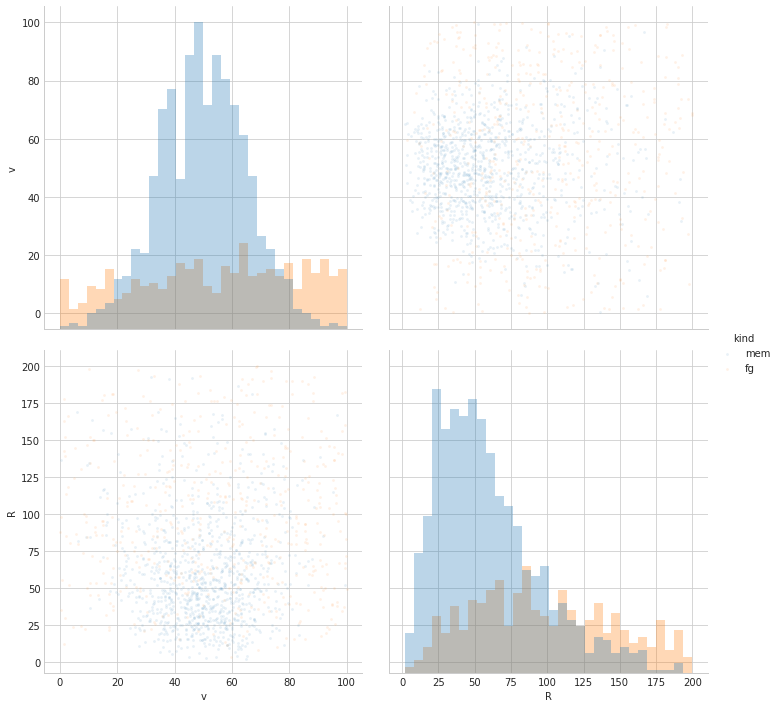

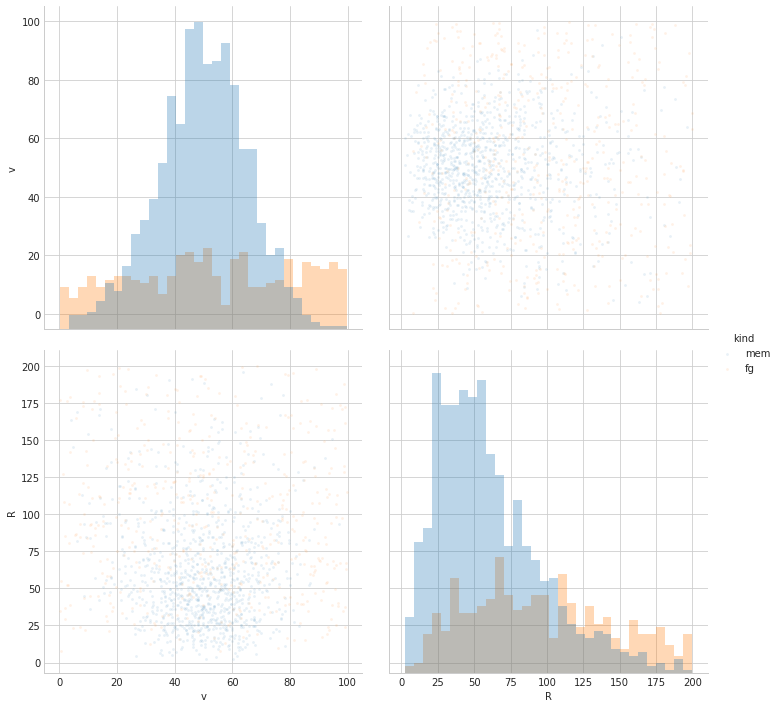

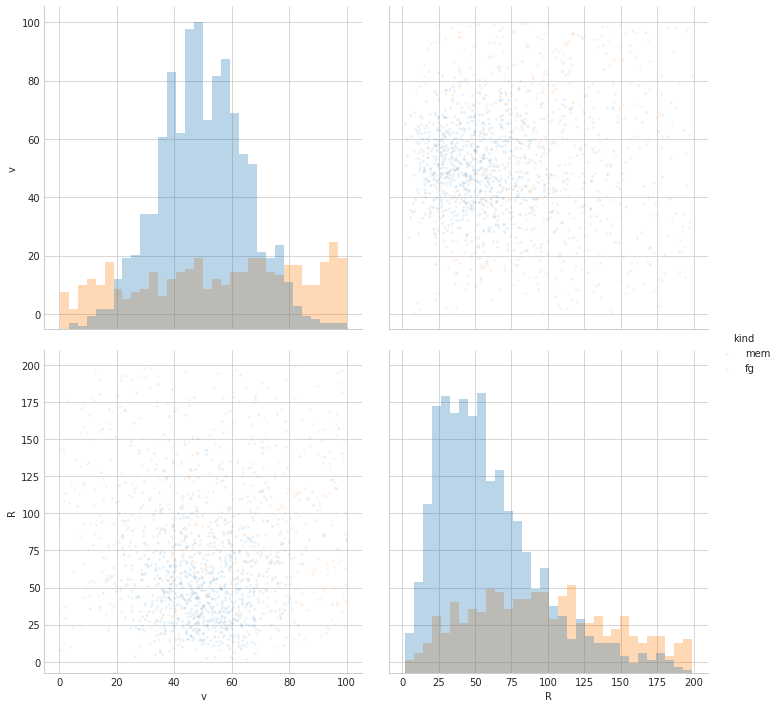

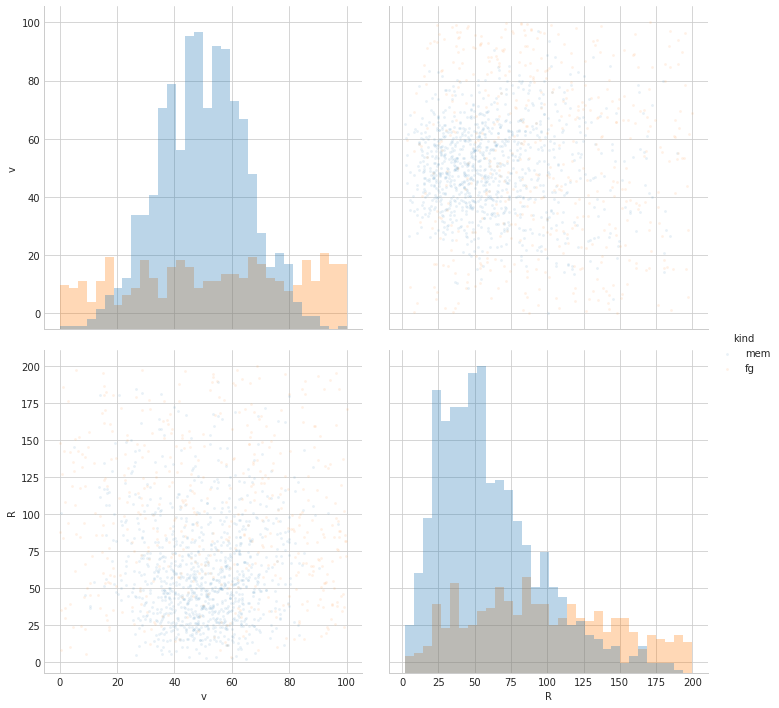

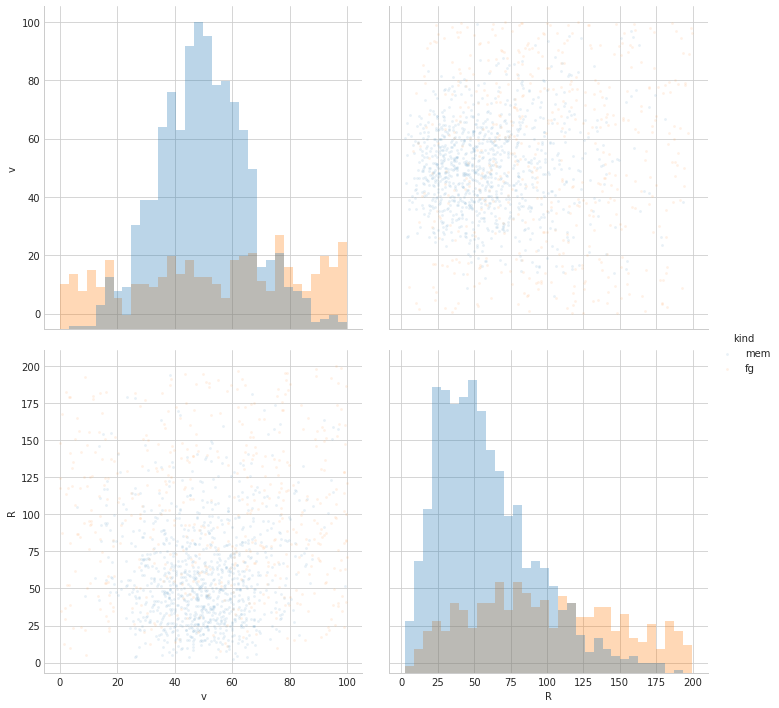

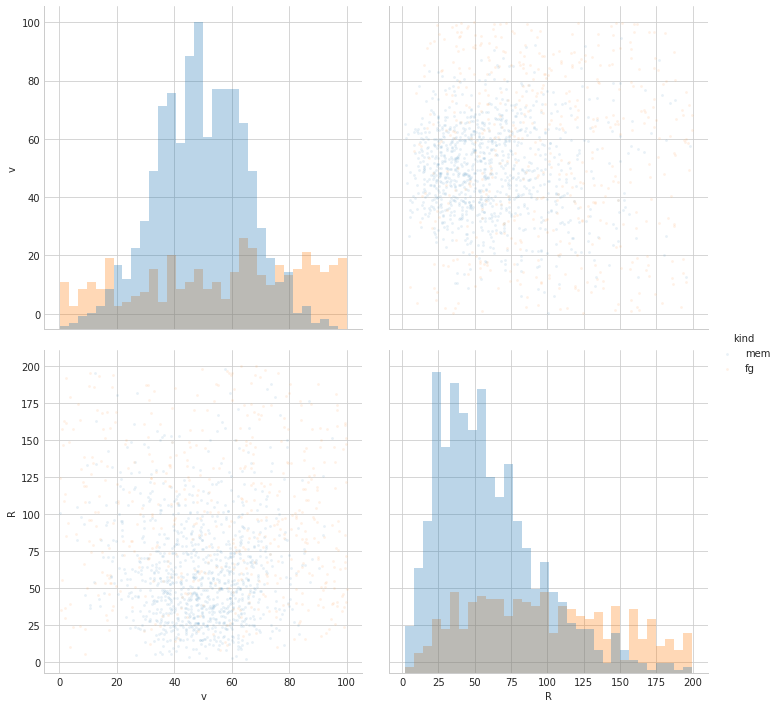

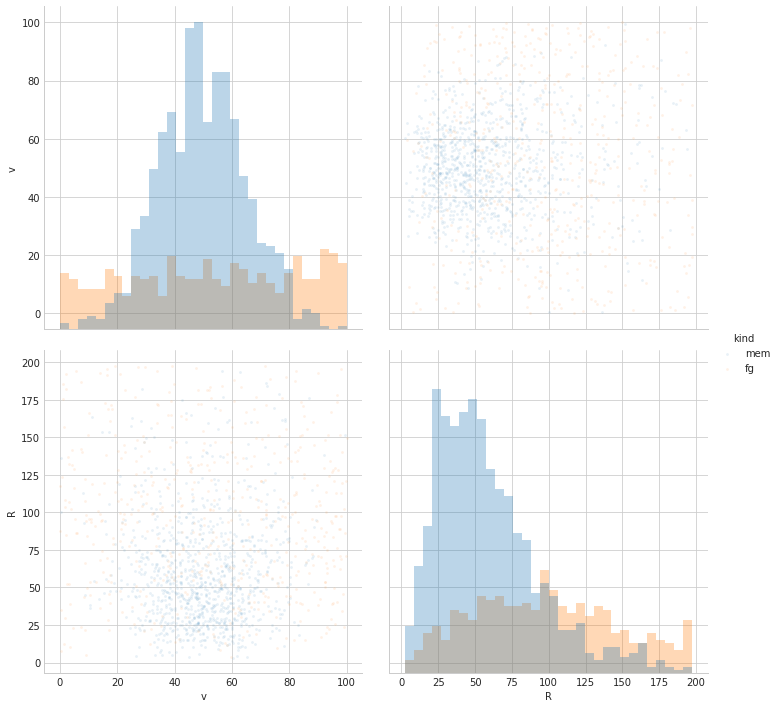

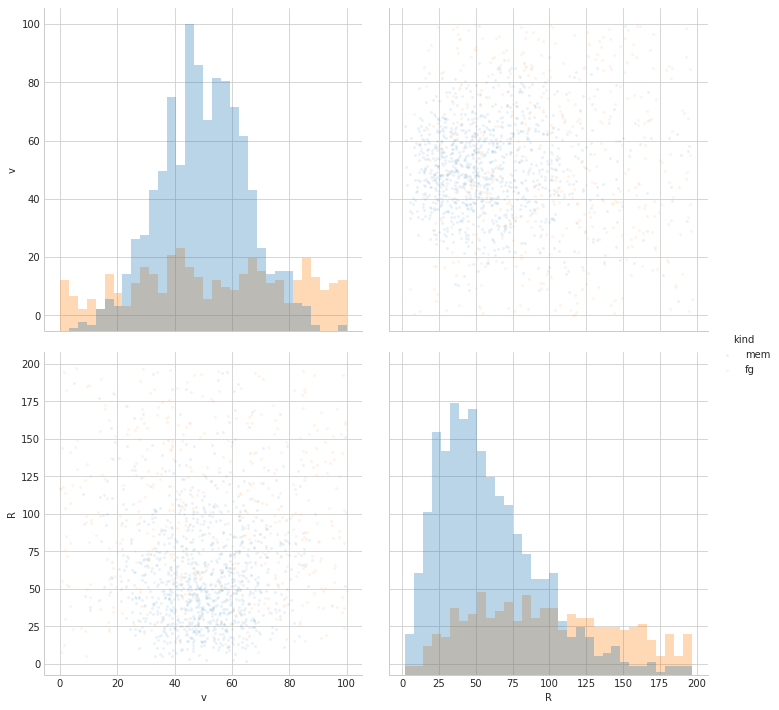

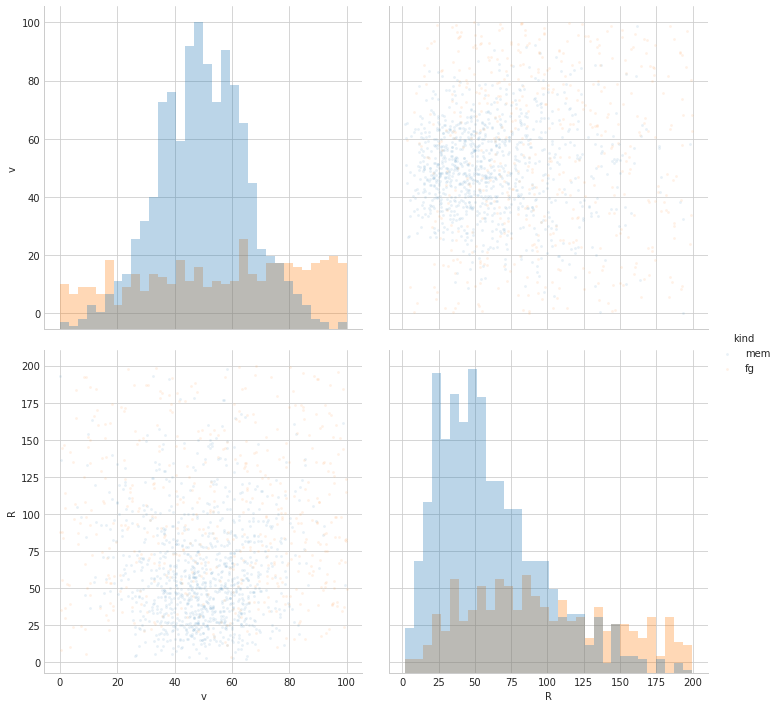

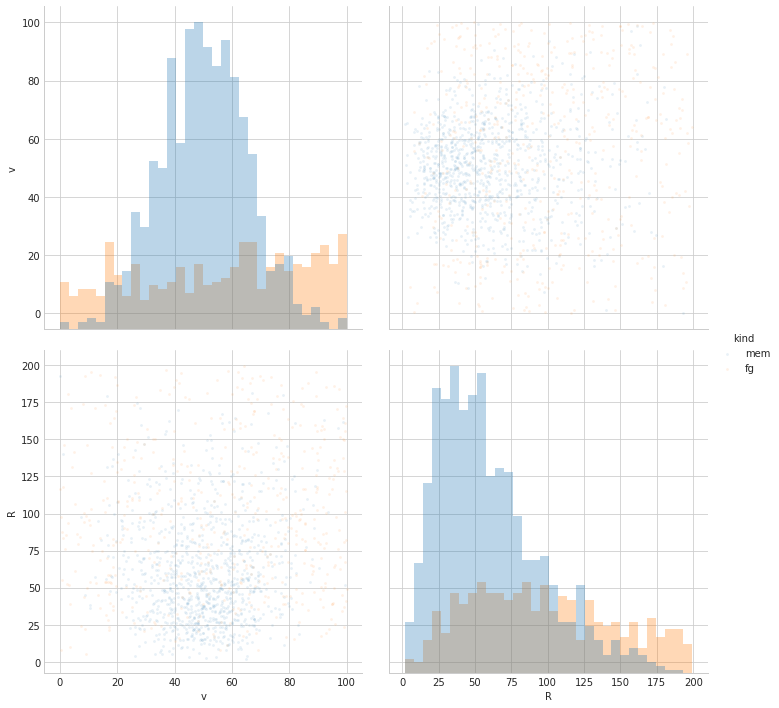

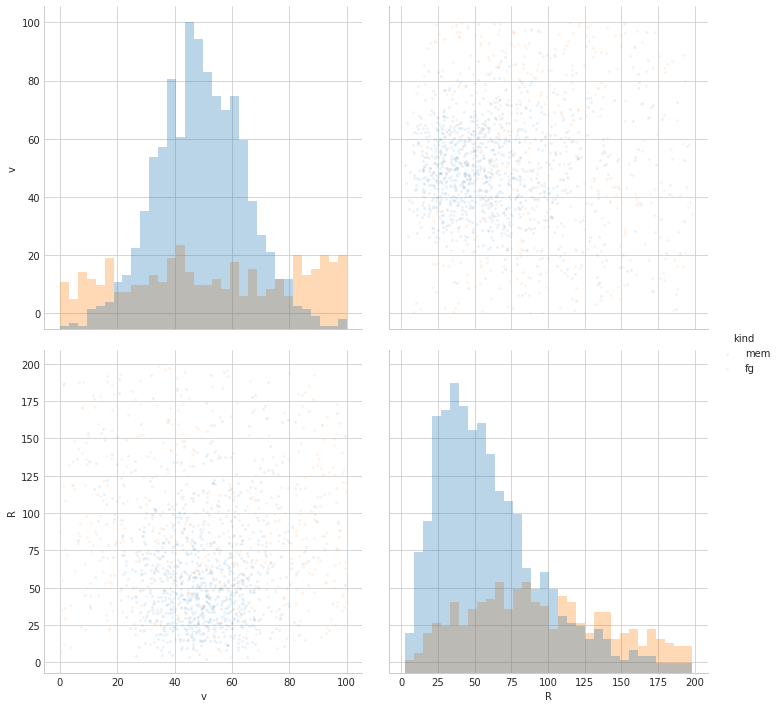

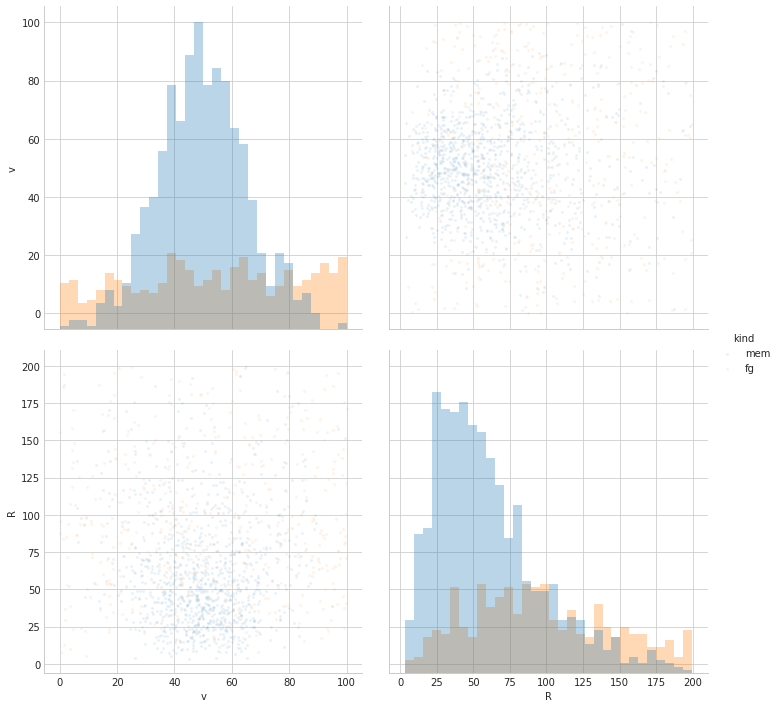

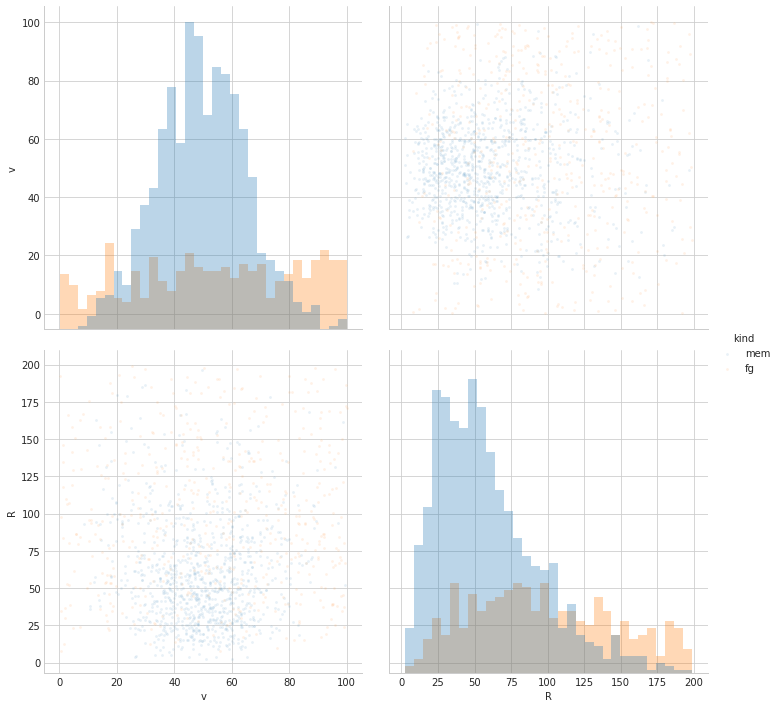

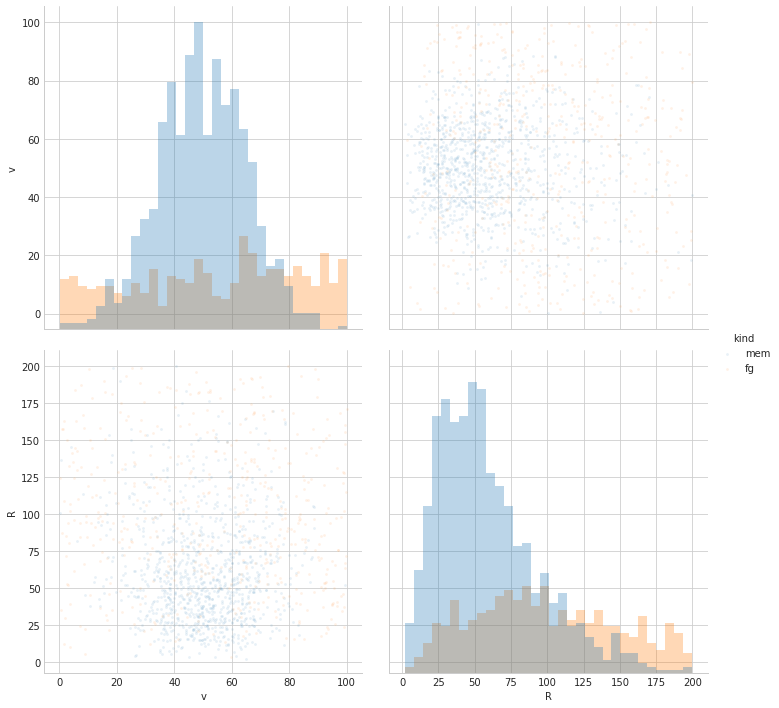

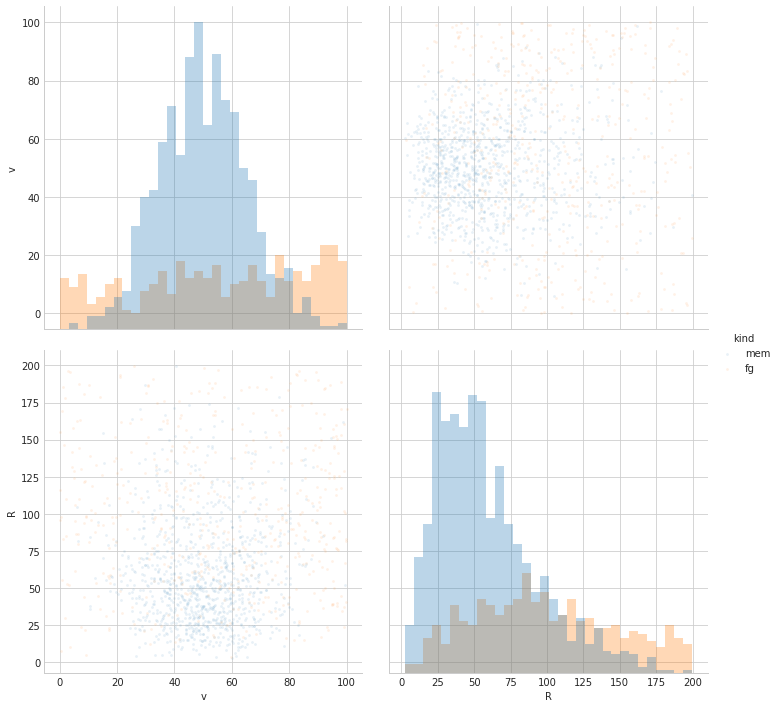

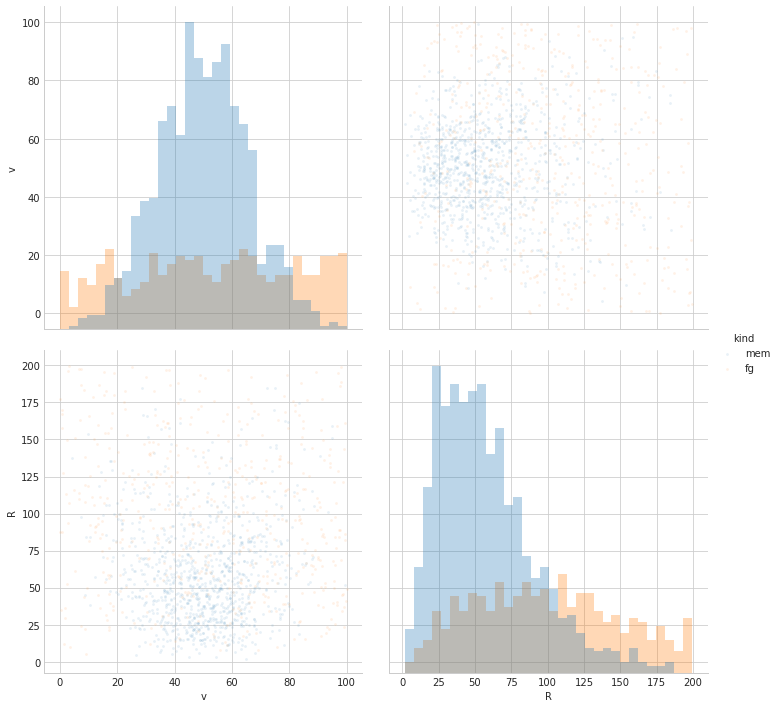

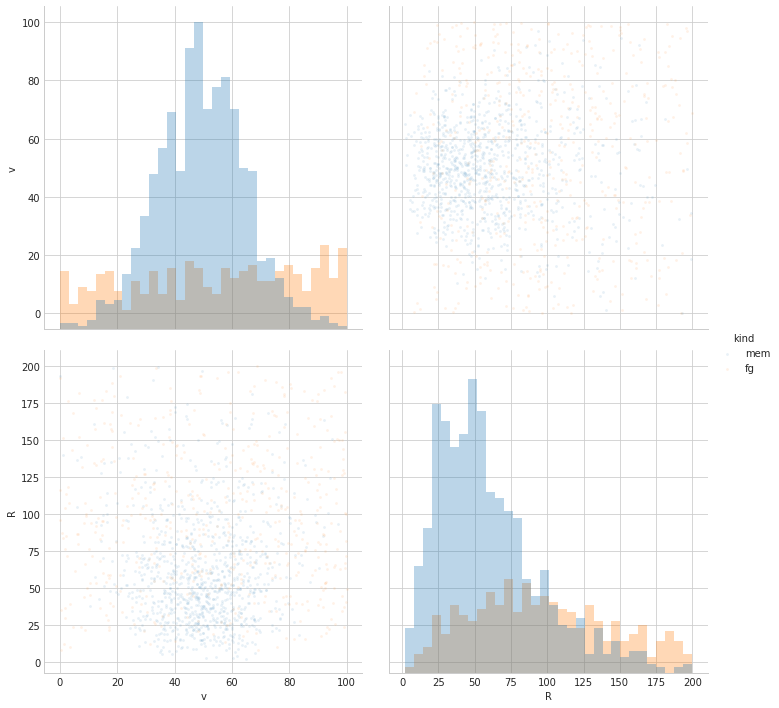

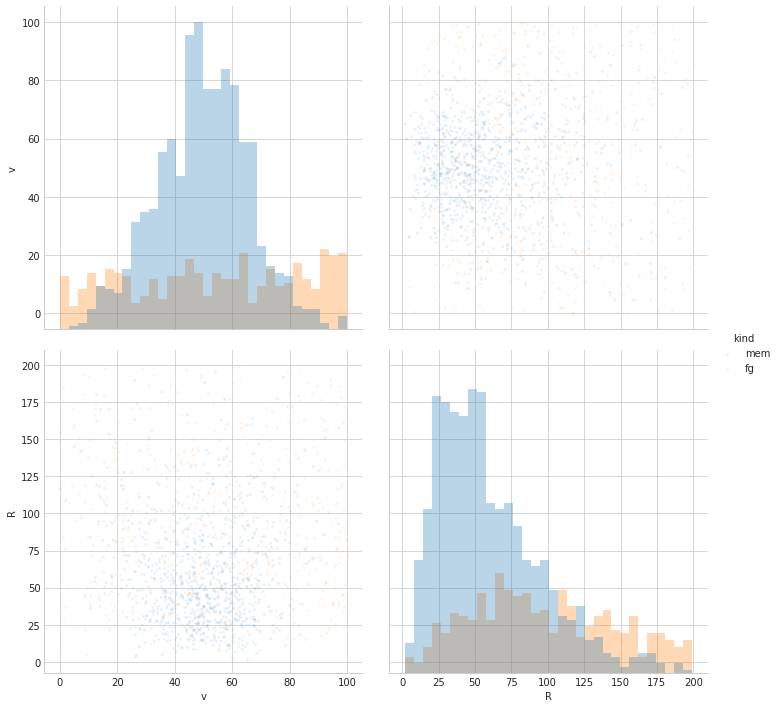

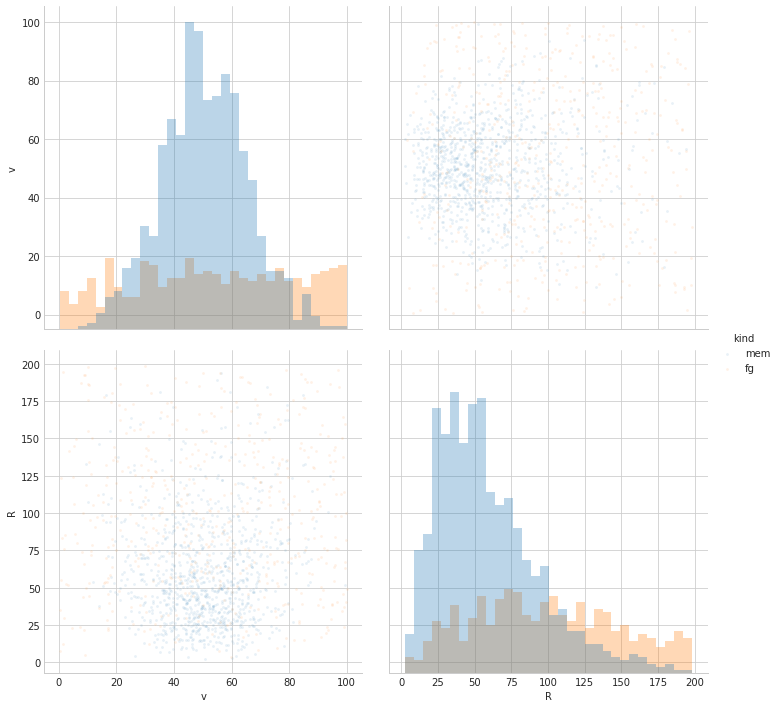

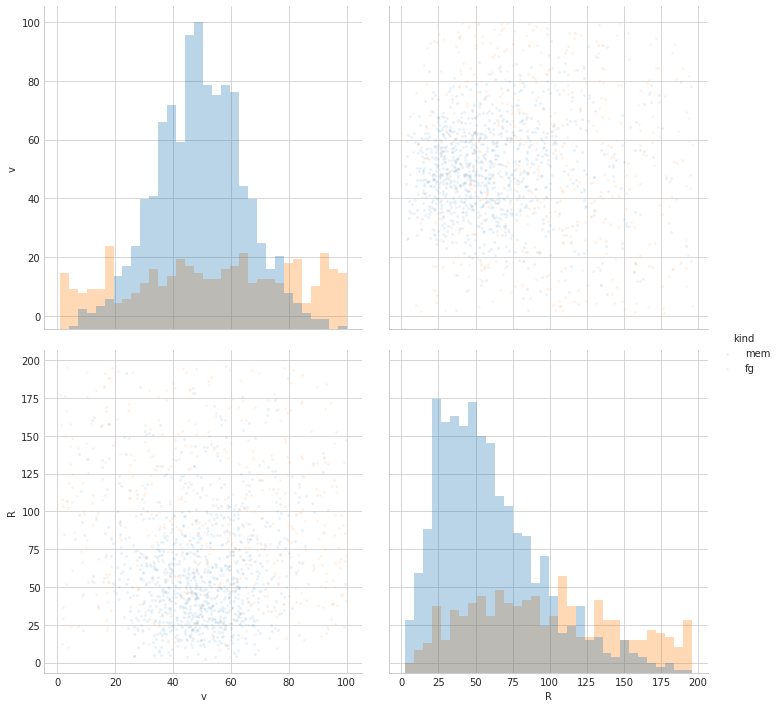

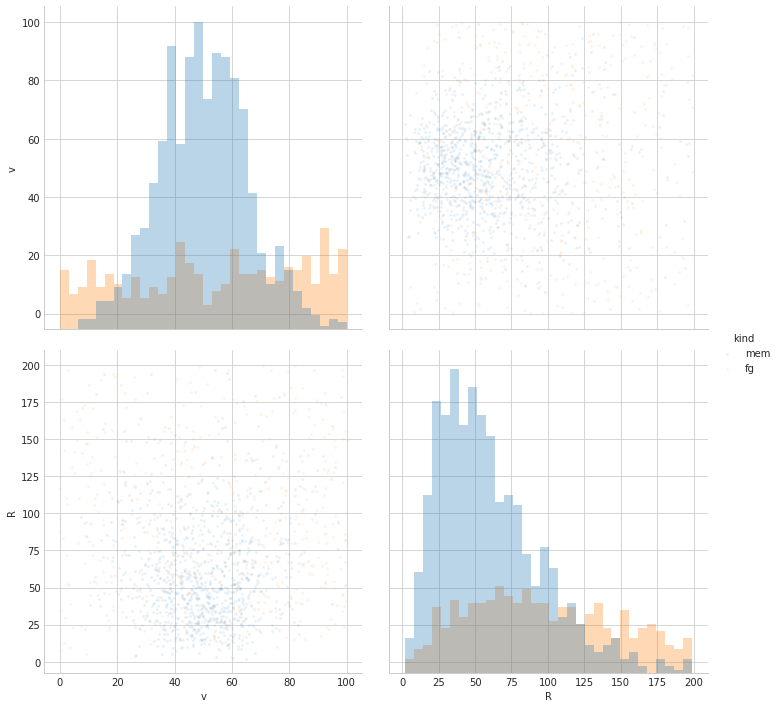

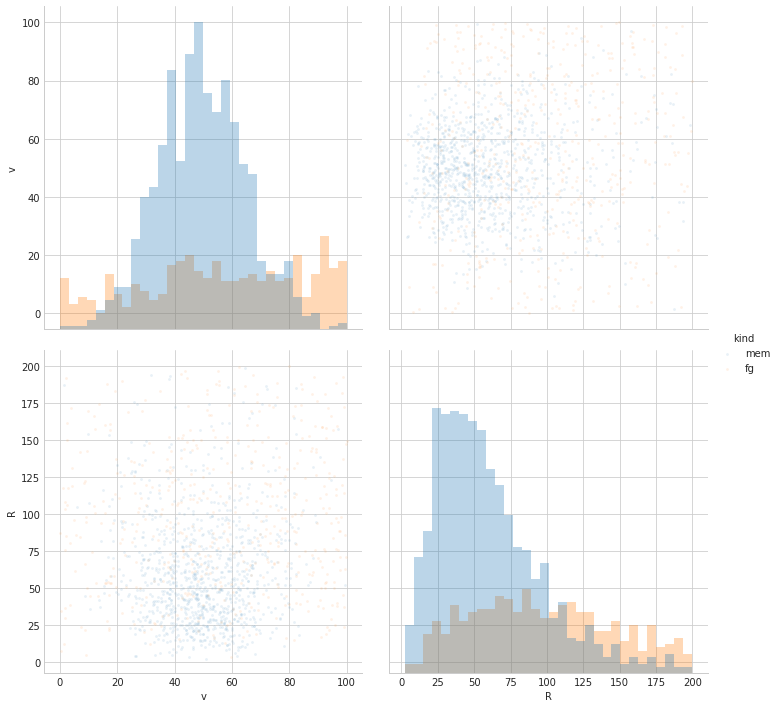

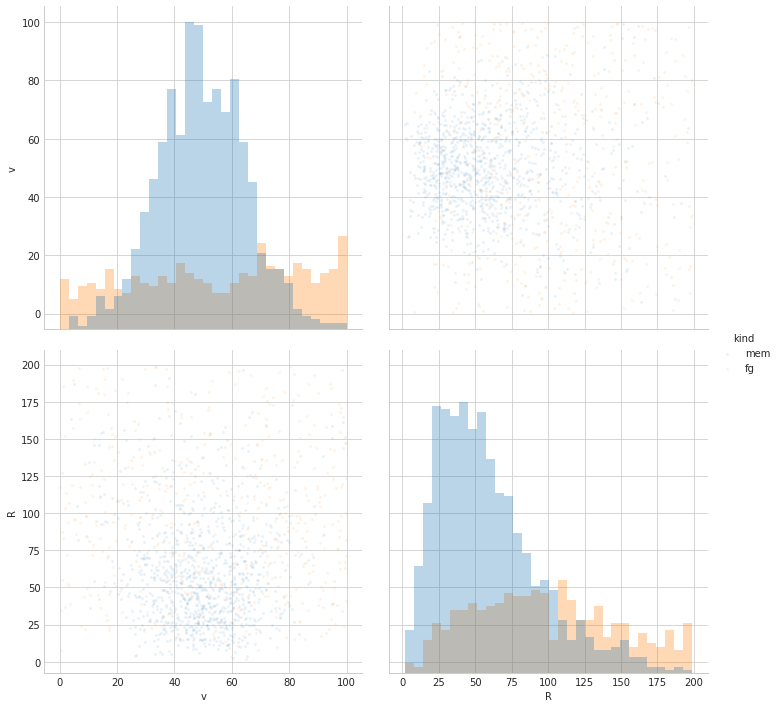

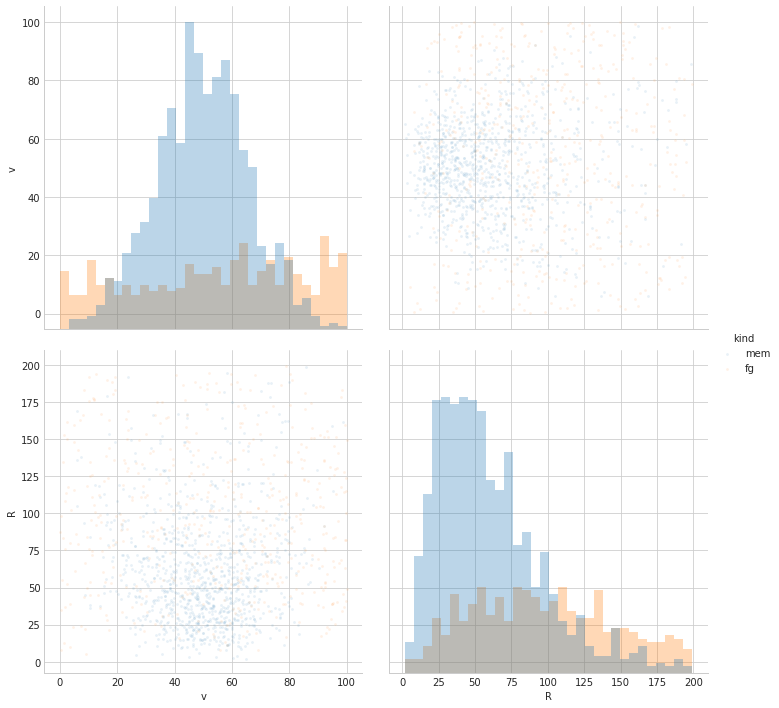

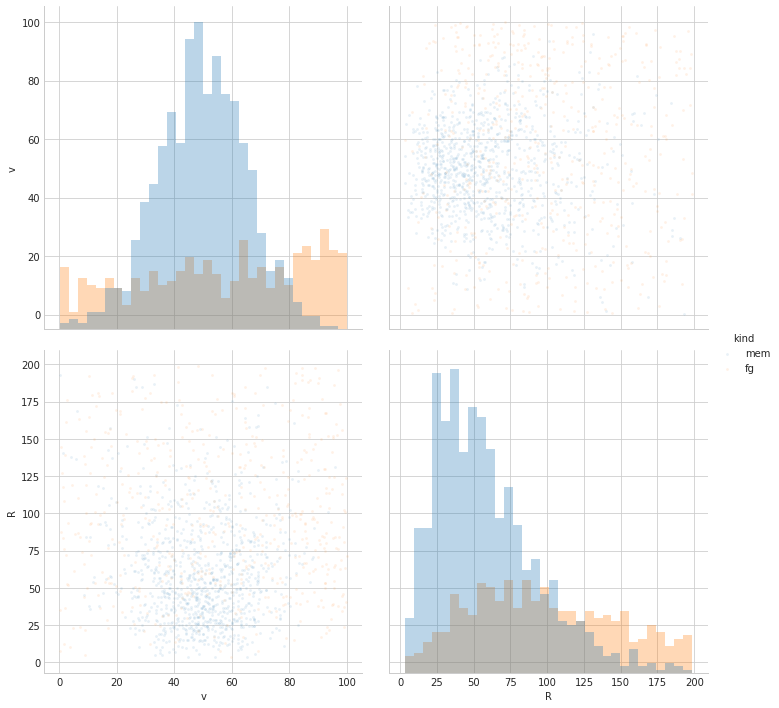

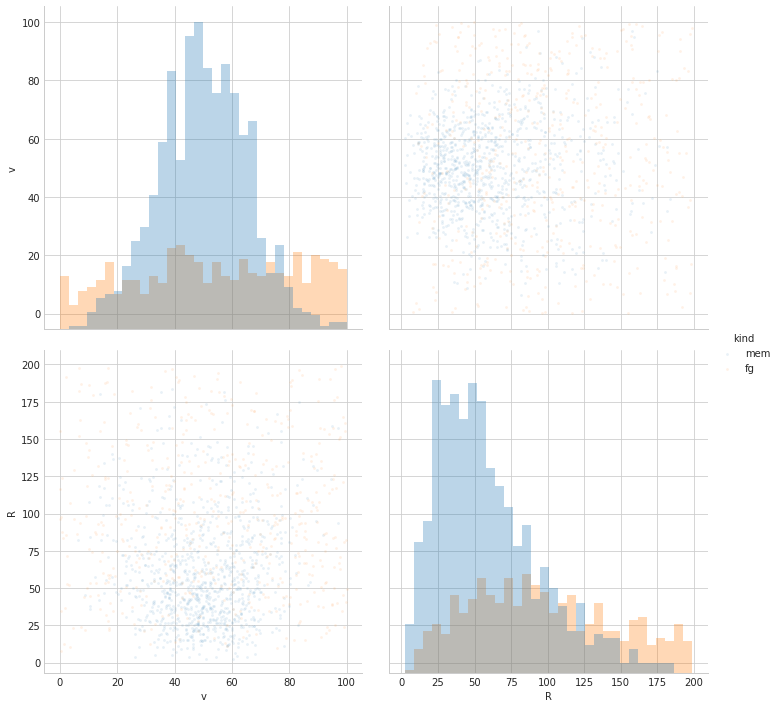

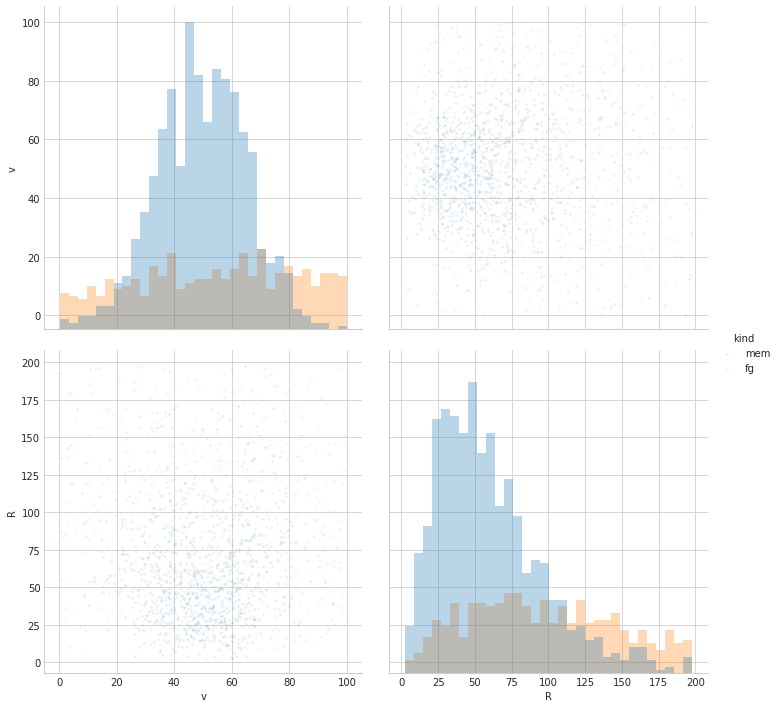

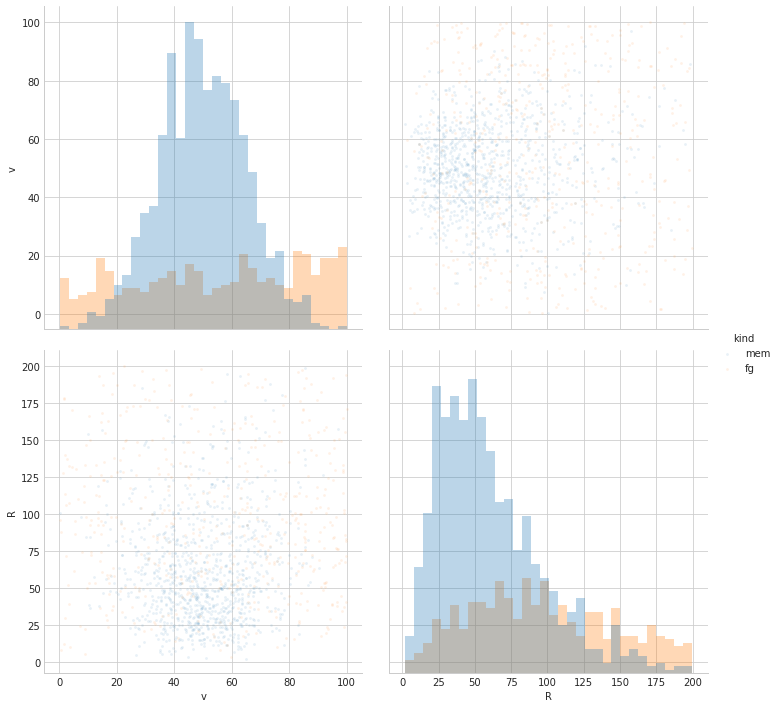

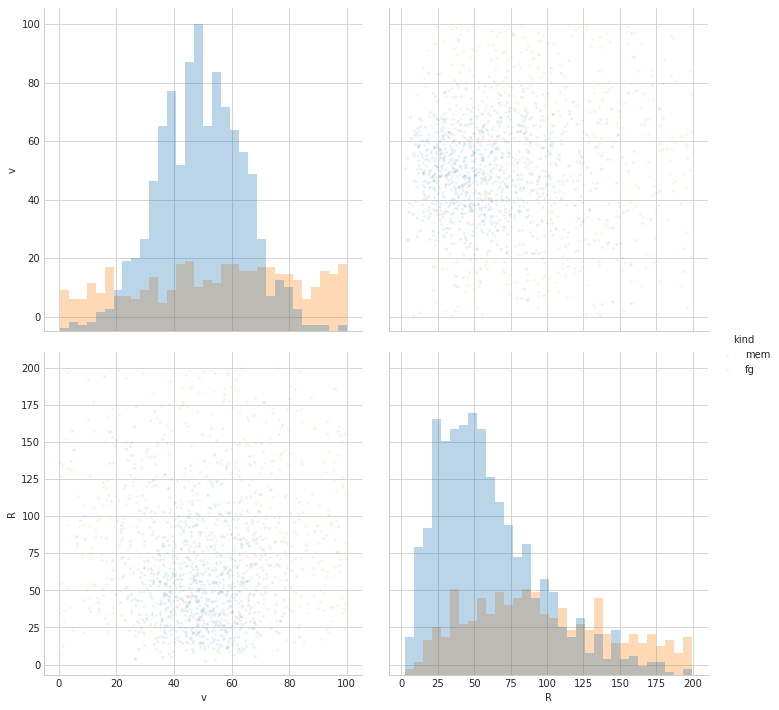

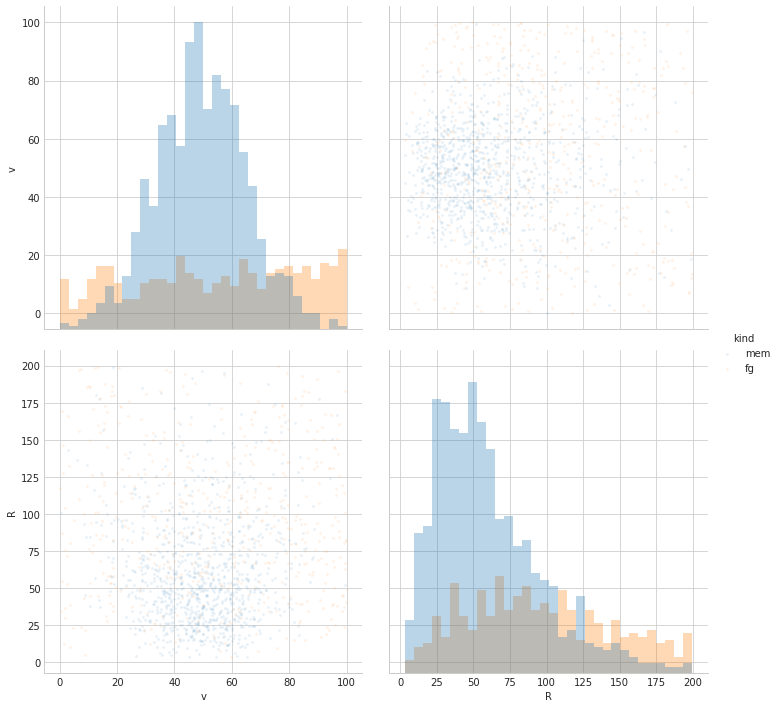

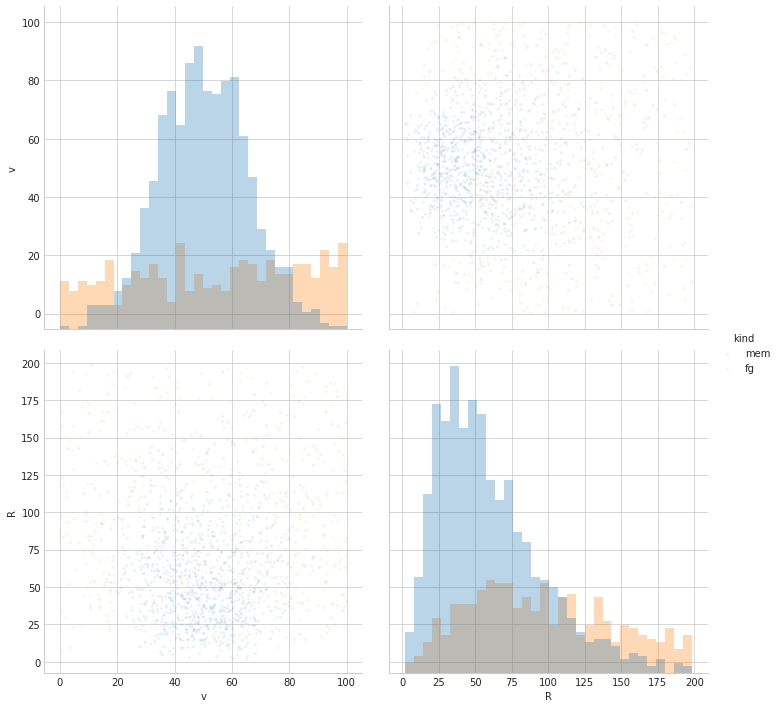

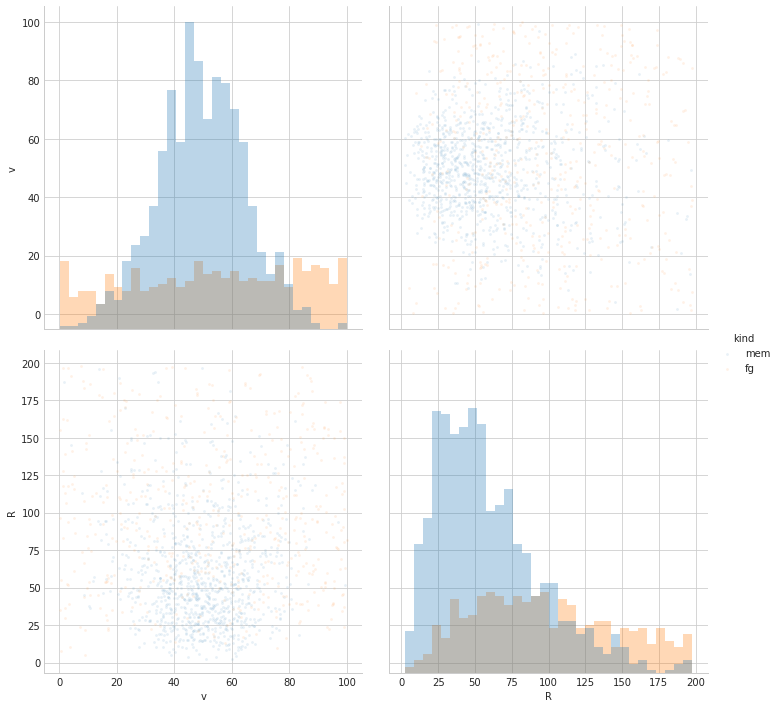

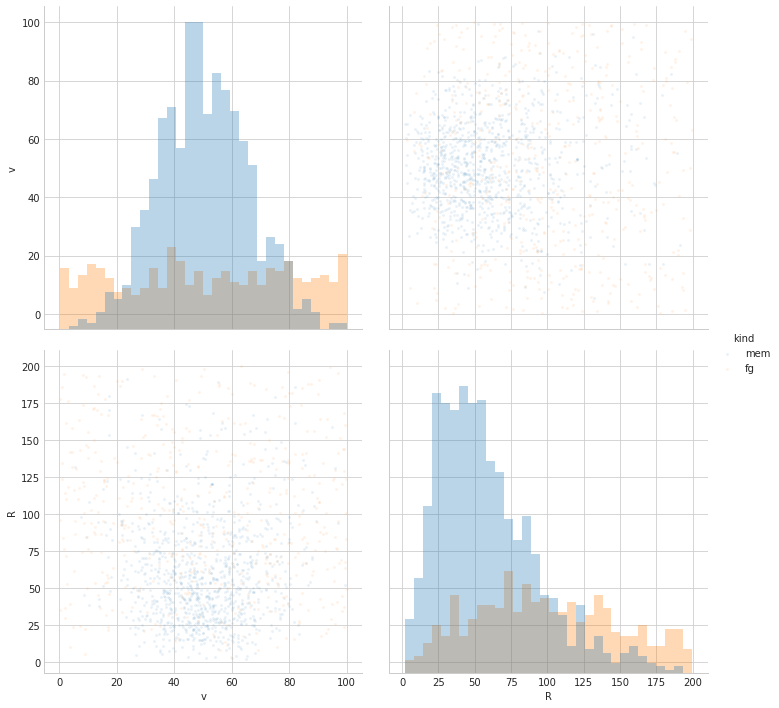

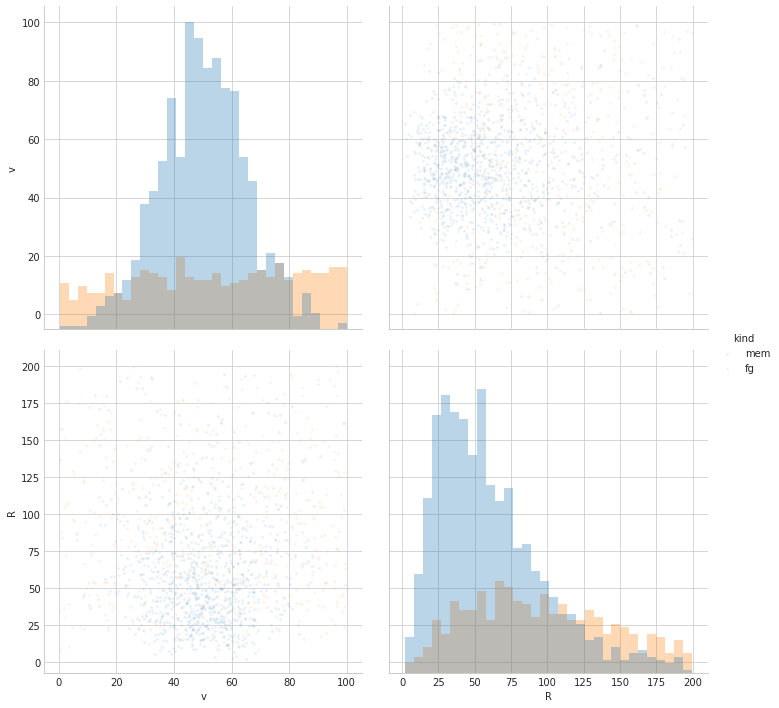

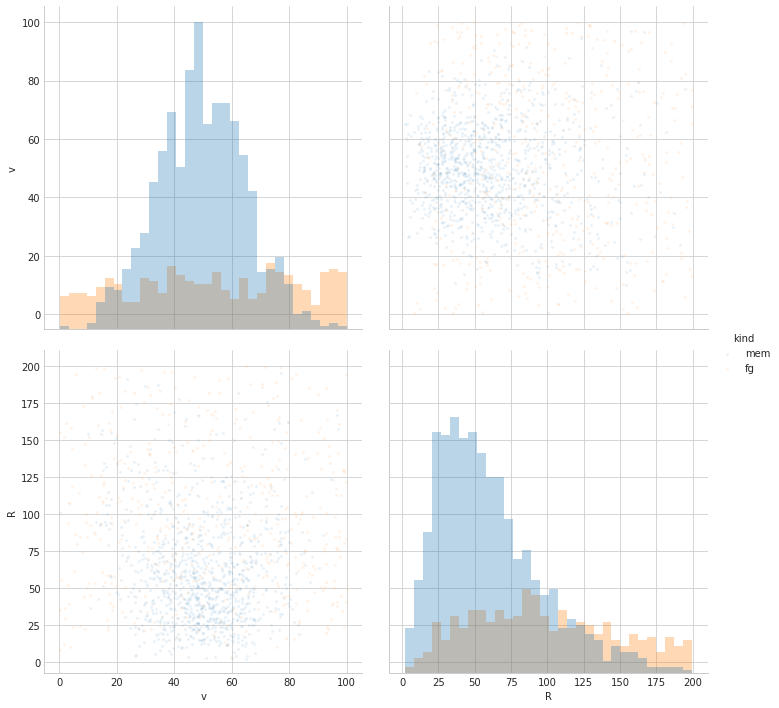

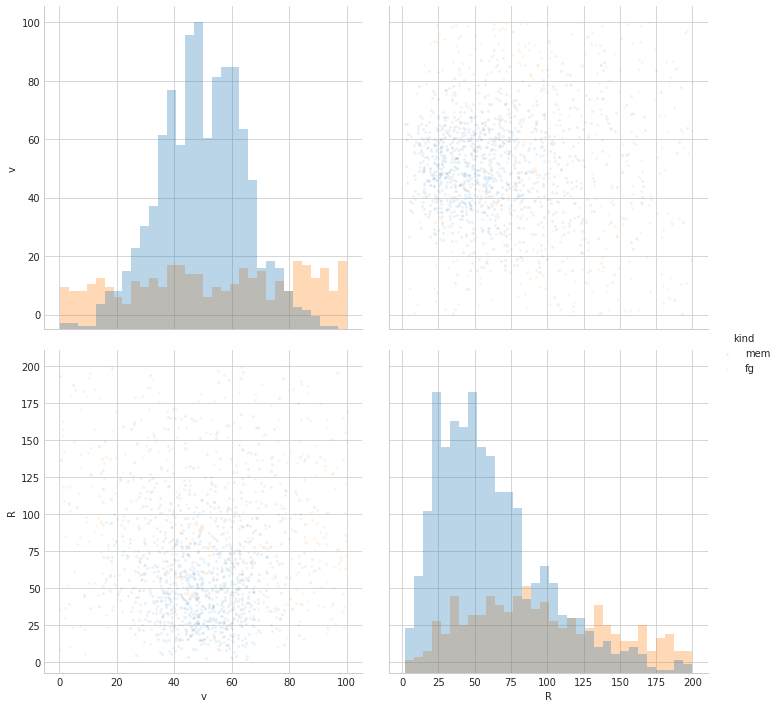

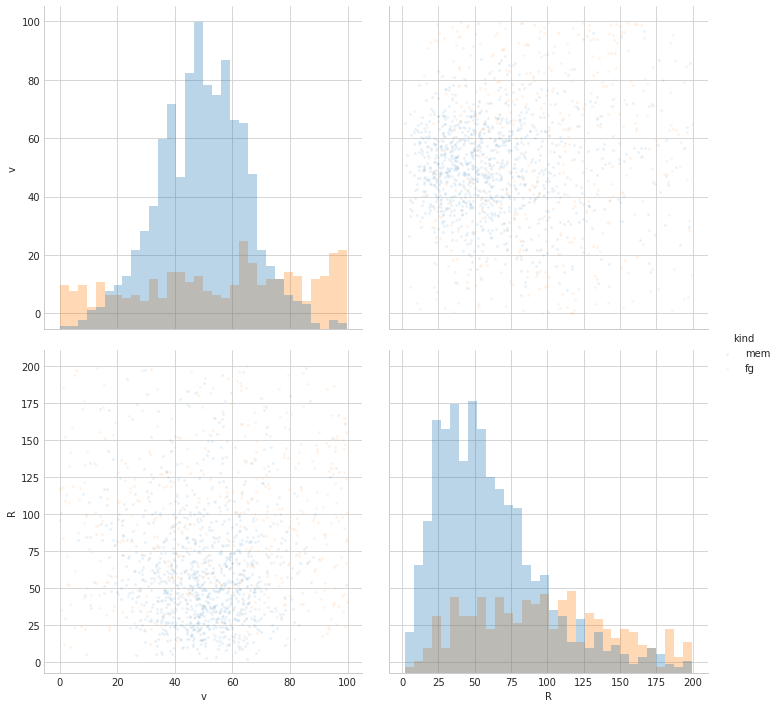

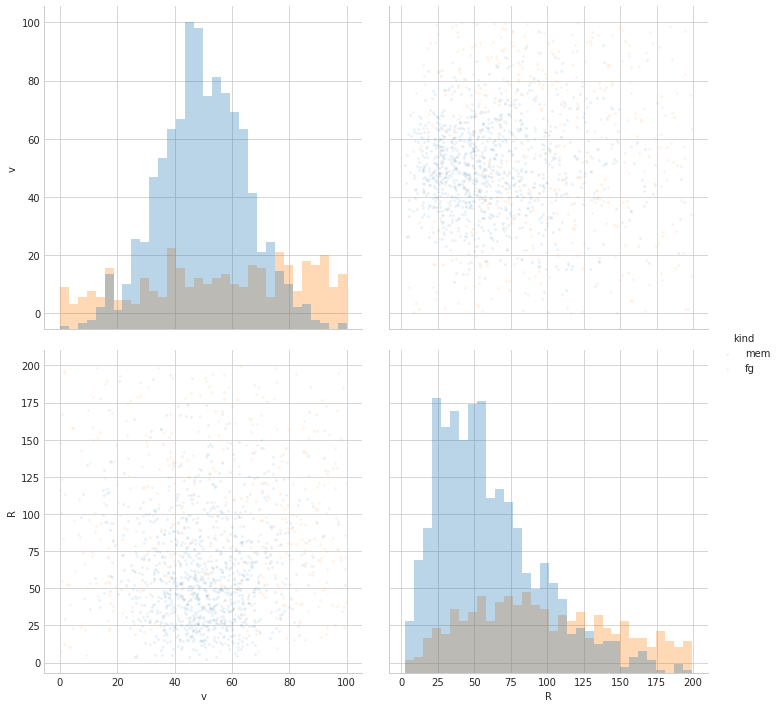

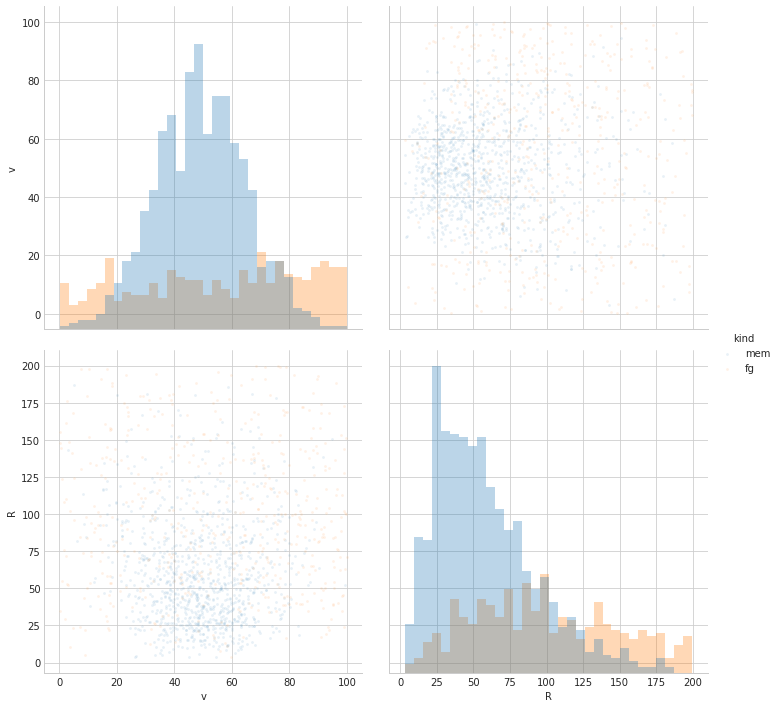

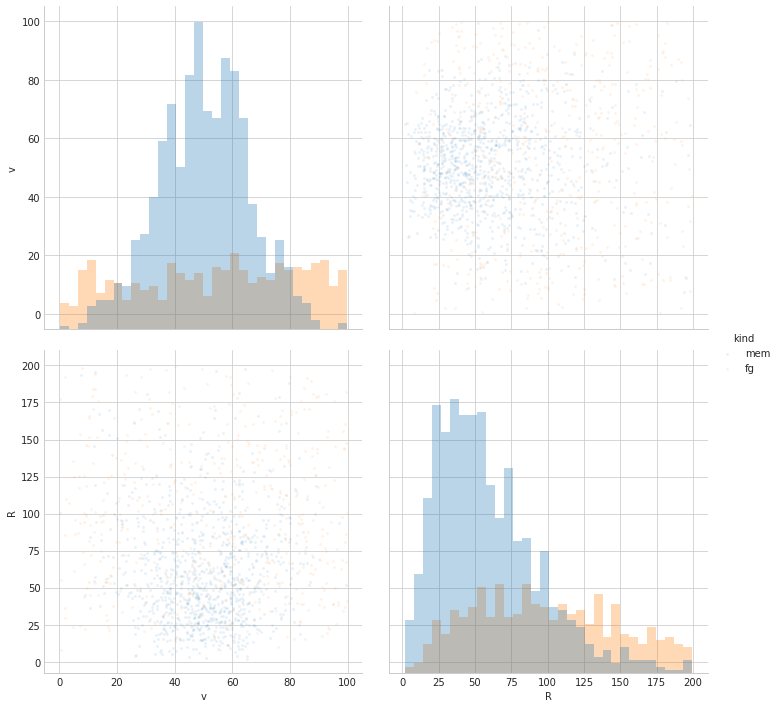

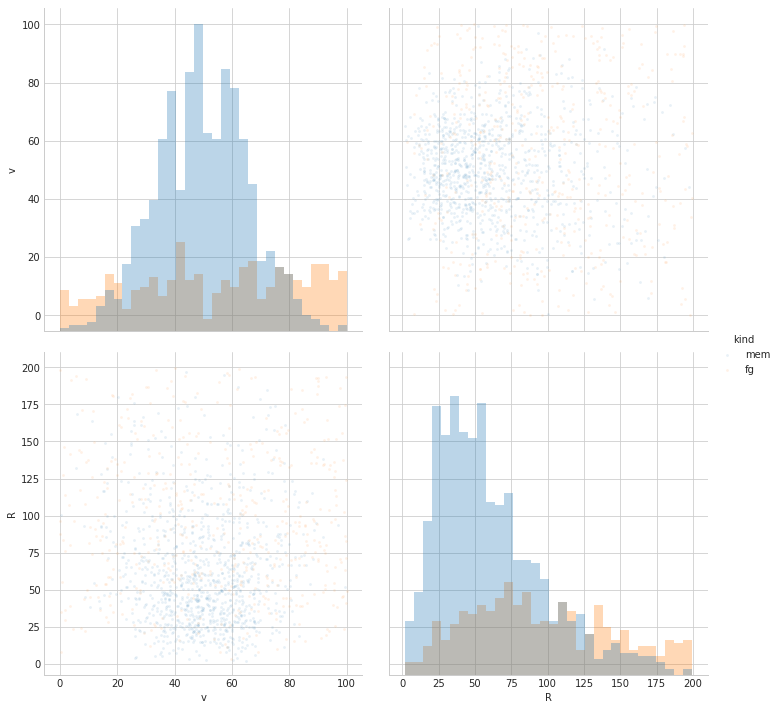

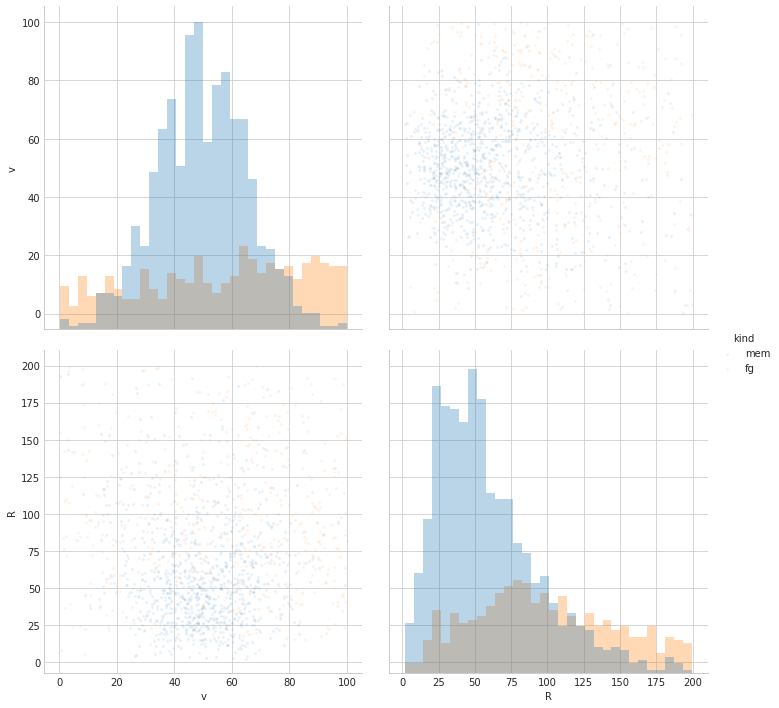

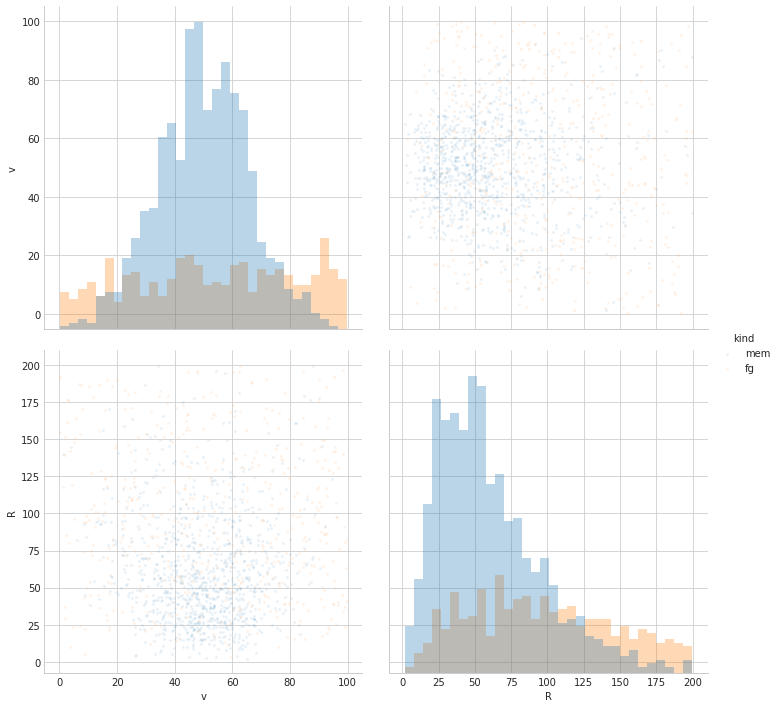

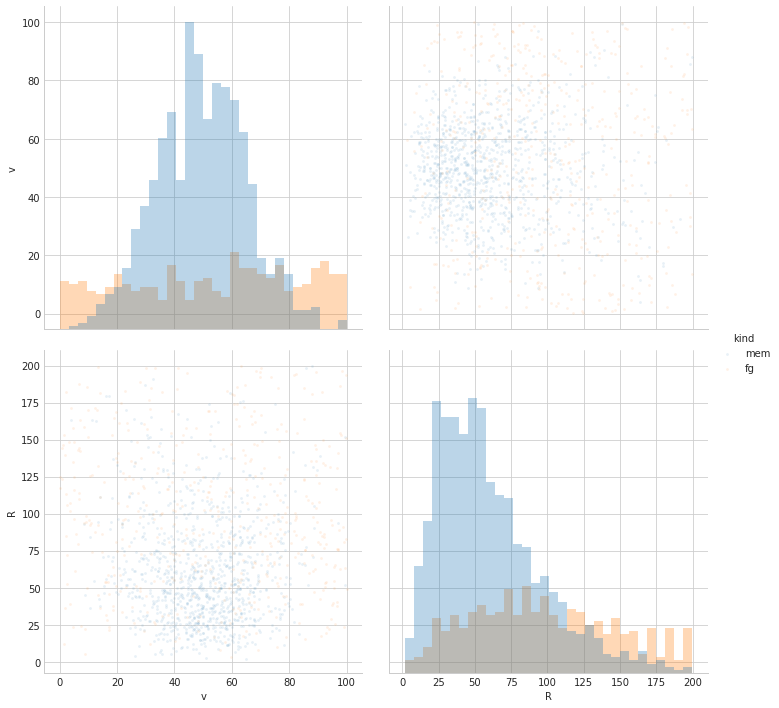

In [46]:
biased_tots = [biased_sampling(tots[0],"mem",k=2.5e4) for i in range(50)]

In [39]:
[biased_tots[i].to_csv("mock_tot_flatten_noMCMC_v001_{}.csv".format(str(i))) for i in range(50)]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [47]:
pd.read_csv("mock_tot_plummerlike_noMCMC_v001_1.csv").describe()

Unnamed: 0            R            v
count  1501.000000  1501.000000  1501.000000
mean   2105.666223    72.192117    51.214995
std    1393.659973    44.240038    21.032154
min       1.000000     3.649571     0.031494
25%     967.000000    37.767193    38.009314
50%    1863.000000    62.076764    50.596207
75%    3228.000000    98.324014    64.037561
max    4994.000000   199.454926    99.933417